In [1]:
# IMPORTING MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LOADING DATASETS
sales_data=pd.read_csv('features.csv',low_memory=False)
sample_submission=pd.read_csv('sampleSubmission.csv')
stores_data=pd.read_csv('stores.csv',low_memory=False)
train_data=pd.read_csv('train.csv',low_memory=False)
test_data=pd.read_csv('test.csv',low_memory=False)

### Information about features
- Store, Store number
- Date
- Temperature
- Fuel price
- markdowns 1-5, anonymized data related to promotional markdowns that Walmart is running.
- (Markdowns are basically the promotions cutdowns or discounts applied or available for that store)
- Customer Price Index
- Unemployment rate
- Isholiday

In [3]:
sales_data.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [4]:
stores_data.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [5]:
train_data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [11]:
#stores_data.isnull().sum()
#train_data.isnull().sum()
#test_data.isnull().sum()
#sales_data.isnull().sum()
# only sales_data have null values with almost 50% of them in all amrkdowns and 585 rows in CPI,unemployment columns

In [19]:
#MERGING THE DATASETS
sales_data_merged=pd.merge(sales_data,stores_data,on="Store",how="inner")
sales_data_merged_final=pd.merge(sales_data_merged,train_data,on=["Store","Date"],how="inner")
df=sales_data_merged_final
df.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Type,Size,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,False
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27,False


In [20]:
# Initial manipulation
df=df.drop(['IsHoliday_y'],axis=1)
df=df.rename(columns={'IsHoliday_x':'IsHoliday'})
df['Date']=pd.to_datetime(df['Date'])
df['IsHoliday']=df['IsHoliday'].astype('int32')
df['Type'] = df['Type'].replace({'A': 0, 'B': 1,'C':2})
df = df.astype({
    'Store': 'int32',
    'Temperature': 'float32',
    'Fuel_Price': 'float32',
    'MarkDown1': 'float32',
    'MarkDown2': 'float32',
    'MarkDown3': 'float32',
    'MarkDown4': 'float32',
    'MarkDown5': 'float32',
    'CPI':'float32',
    'Unemployment':'float32',
    'Size':'int32',
    'Dept':'int32',
    'Weekly_Sales':'int32'
})


C:\Users\HP\AppData\Local\Temp\ipykernel_31380\3436881334.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type'] = df['Type'].replace({'A': 0, 'B': 1,'C':2})


In [21]:
df.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.310001,2.572,NaN,NaN,NaN,NaN,NaN,211.096359,8.106,0,0,151315,1,24924
1,1,2010-02-05,42.310001,2.572,NaN,NaN,NaN,NaN,NaN,211.096359,8.106,0,0,151315,2,50605


In [22]:
## Descriptive analysis of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int32         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float32       
 3   Fuel_Price    421570 non-null  float32       
 4   MarkDown1     150681 non-null  float32       
 5   MarkDown2     111248 non-null  float32       
 6   MarkDown3     137091 non-null  float32       
 7   MarkDown4     134967 non-null  float32       
 8   MarkDown5     151432 non-null  float32       
 9   CPI           421570 non-null  float32       
 10  Unemployment  421570 non-null  float32       
 11  IsHoliday     421570 non-null  int32         
 12  Type          421570 non-null  int64         
 13  Size          421570 non-null  int32         
 14  Dept          421570 non-null  int32         
 15  Weekly_Sales  421

In [23]:
df.describe()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
count,421570.000000,421570,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,2011-06-18 08:30:31.963375360,60.090057,3.361027,7246.420410,3334.628418,1439.421387,3383.168213,4628.974609,171.201950,7.960289,0.070358,0.589912,136727.915739,44.260317,15980.788588
min,1.000000,2010-02-05 00:00:00,-2.060000,2.472000,0.270000,-265.760010,-29.100000,0.220000,135.160004,126.064003,3.879000,0.000000,0.000000,34875.000000,1.000000,-4988.000000
25%,11.000000,2010-10-08 00:00:00,46.680000,2.933000,2240.270020,41.599998,5.080000,504.220001,1878.439941,132.022659,6.891000,0.000000,0.000000,93638.000000,18.000000,2079.000000
50%,22.000000,2011-06-17 00:00:00,62.090000,3.452000,5347.450195,192.000000,24.600000,1481.310059,3359.449951,182.318787,7.866000,0.000000,0.000000,140167.000000,37.000000,7612.000000
75%,33.000000,2012-02-24 00:00:00,74.279999,3.738000,9210.900391,1926.939941,103.989998,3595.040039,5563.799805,212.416992,8.572000,0.000000,1.000000,202505.000000,74.000000,20205.000000
max,45.000000,2012-10-26 00:00:00,100.139999,4.468000,88646.757812,104519.539062,141630.609375,67474.851562,108519.281250,227.232803,14.313000,1.000000,2.000000,219622.000000,99.000000,693099.000000
std,12.785297,NaN,18.446705,0.458504,8291.011719,9475.768555,9625.418945,6292.317383,5962.929688,39.157127,1.863254,0.255750,0.666337,60980.583328,30.492054,22711.168248


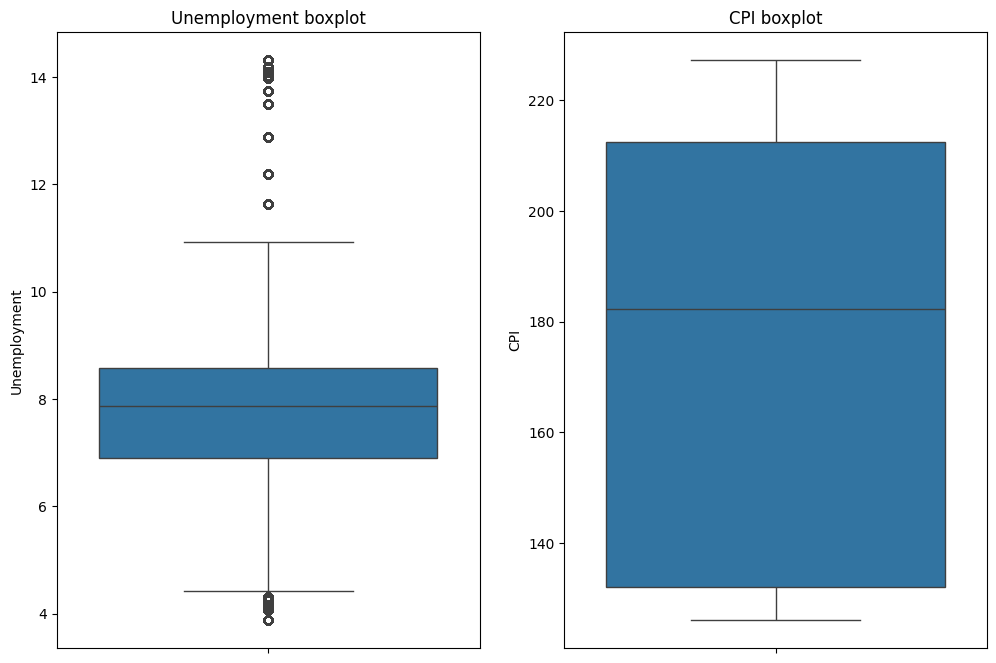

In [29]:
## we need to fill those unemployment and cpi nan values or they will later cause wrong predictions
fig, axes = plt.subplots(1, 2 ,figsize=(12, 8))
sns.boxplot(df['Unemployment'],ax=axes[0])
axes[0].set_title('Unemployment boxplot')
sns.boxplot(df['CPI'],ax=axes[1])
axes[1].set_title('CPI boxplot')
plt.show()

<Axes: xlabel='Date', ylabel='Unemployment'>

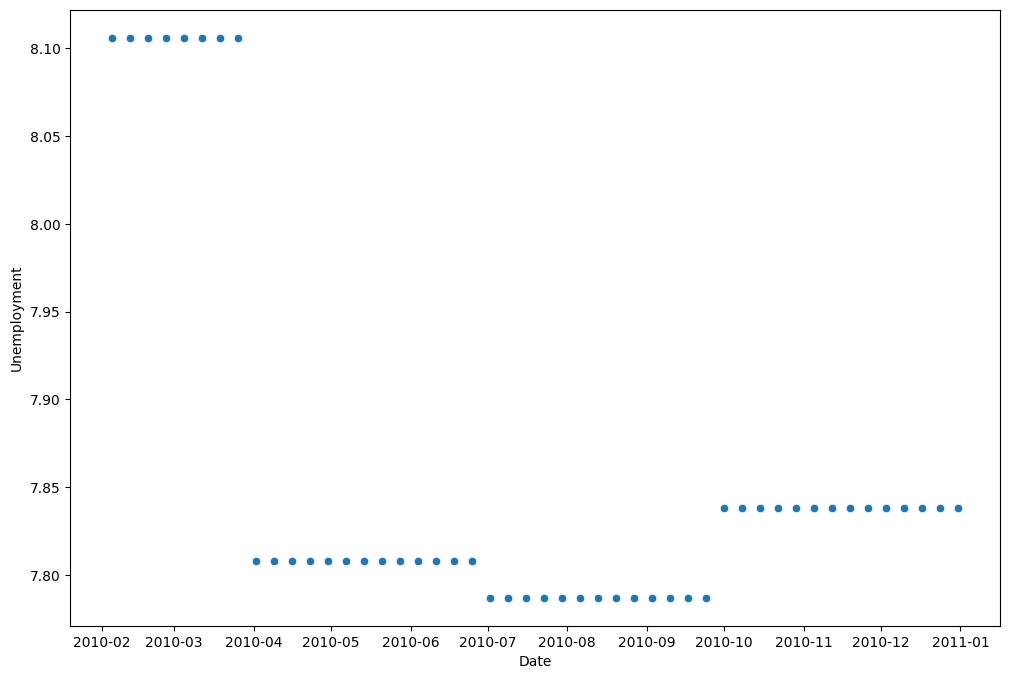

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['Date'][(df['Date'].dt.year==2010) & (df['Store']==1)],y=df['Unemployment'])


In [44]:
df.corr()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
Store,1.000000,0.003362,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.000548,0.226410,-0.182881,0.024004,-0.085195
Date,0.003362,1.000000,0.147064,0.771913,-0.019758,-0.309871,-0.218851,-0.060076,-0.079146,0.077001,-0.243370,-0.013017,0.004223,-0.005437,0.004054,-0.000663
Temperature,-0.050097,0.147064,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.155949,0.042981,-0.058313,0.004437,-0.002312
Fuel_Price,0.065290,0.771913,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,-0.078281,0.029687,0.003361,0.003572,-0.000121
MarkDown1,-0.119588,-0.019758,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,-0.035586,-0.257427,0.345673,-0.002426,0.085251
MarkDown2,-0.035173,-0.309871,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.334818,-0.067034,0.108827,0.000290,0.024130
MarkDown3,-0.031556,-0.218851,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.427960,-0.037560,0.048913,0.001784,0.060385
MarkDown4,-0.009941,-0.060076,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,-0.000562,-0.108991,0.168196,0.004257,0.045414
MarkDown5,-0.026634,-0.079146,-0.017544,-0.128065,0.160257,-0.007440,-0.026467,0.107792,1.000000,0.060630,-0.003843,-0.053719,-0.258835,0.304575,0.000109,0.090362
CPI,-0.211088,0.077001,0.182112,-0.164210,-0.055558,-0.039534,-0.023590,-0.049628,0.060630,1.000000,-0.299953,-0.001944,-0.065812,-0.003314,-0.007477,-0.020921


In [42]:
## fuel price and Date have very less impact as per corr matrix
## fuel price and date have mulicolinearity 0.7719
## markdown1 and markdown4 have multicollinerity 0.819
## Type and Size hve collinearity -0.811

In [45]:
# replacing null values in markdown
df=df.fillna(0)

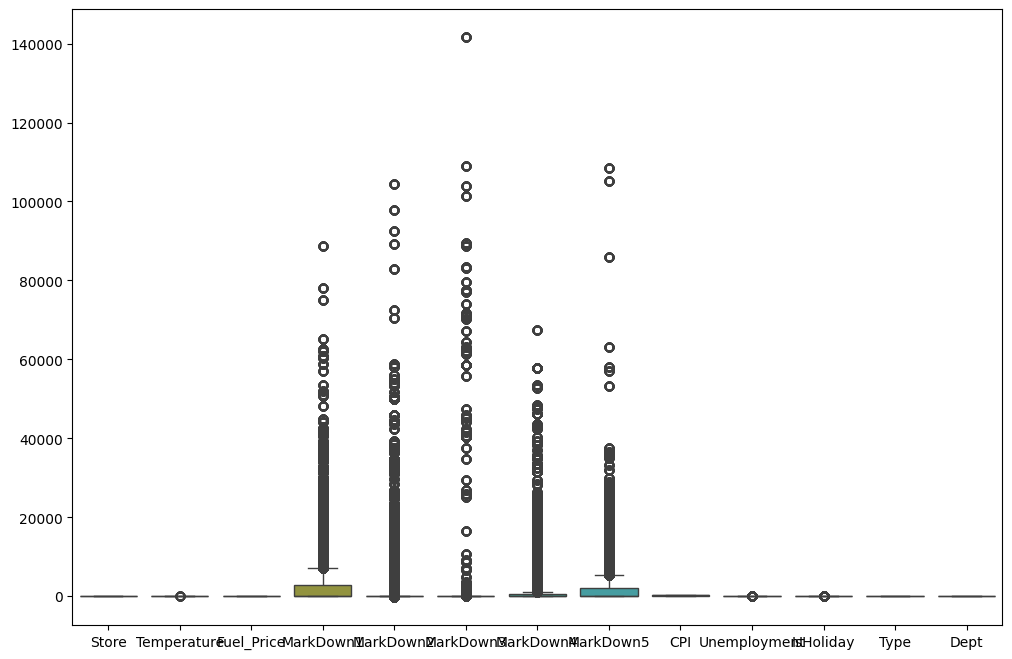

In [50]:
plt.figure(figsize=(12,8))
sns.boxplot(df.drop(['Weekly_Sales','Size'],axis=1))
plt.show()
## lot of outliers in markdowns

<Axes: >

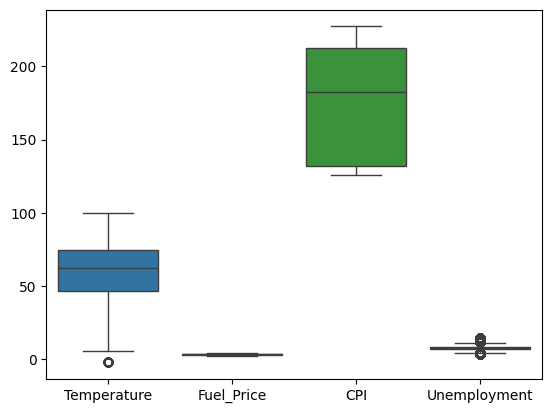

In [54]:
sns.boxplot(df[['Temperature','Fuel_Price','CPI','Unemployment',]])
## outliers in unemployment column

<Axes: ylabel='Temperature'>

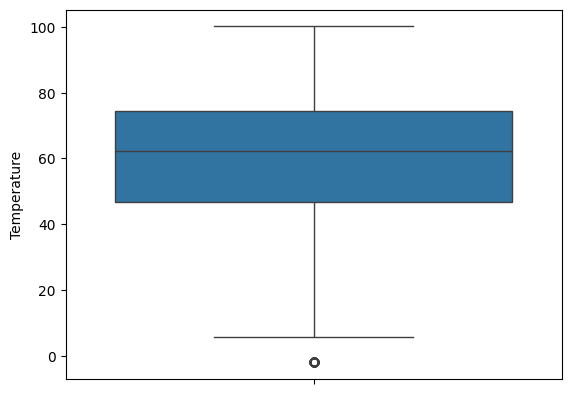

In [55]:
sns.boxplot(df['Temperature'])

In [58]:
df[df['Temperature']<1]
## on "2011-02-04" temperature is -2.06

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
62553,7,2011-02-04,-2.06,3.011,0.0,0.0,0.0,0.0,0.0,191.762589,8.818,0,1,70713,1,8976
62554,7,2011-02-04,-2.06,3.011,0.0,0.0,0.0,0.0,0.0,191.762589,8.818,0,1,70713,2,21568
62555,7,2011-02-04,-2.06,3.011,0.0,0.0,0.0,0.0,0.0,191.762589,8.818,0,1,70713,3,7555
62556,7,2011-02-04,-2.06,3.011,0.0,0.0,0.0,0.0,0.0,191.762589,8.818,0,1,70713,4,15306
62557,7,2011-02-04,-2.06,3.011,0.0,0.0,0.0,0.0,0.0,191.762589,8.818,0,1,70713,5,12835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62617,7,2011-02-04,-2.06,3.011,0.0,0.0,0.0,0.0,0.0,191.762589,8.818,0,1,70713,94,-2
62618,7,2011-02-04,-2.06,3.011,0.0,0.0,0.0,0.0,0.0,191.762589,8.818,0,1,70713,95,33881
62619,7,2011-02-04,-2.06,3.011,0.0,0.0,0.0,0.0,0.0,191.762589,8.818,0,1,70713,96,1412
62620,7,2011-02-04,-2.06,3.011,0.0,0.0,0.0,0.0,0.0,191.762589,8.818,0,1,70713,97,4601


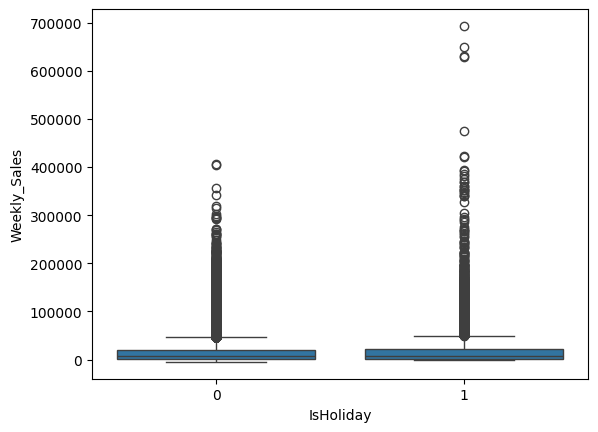

In [60]:
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.show()



<Axes: xlabel='Date', ylabel='Weekly_Sales'>

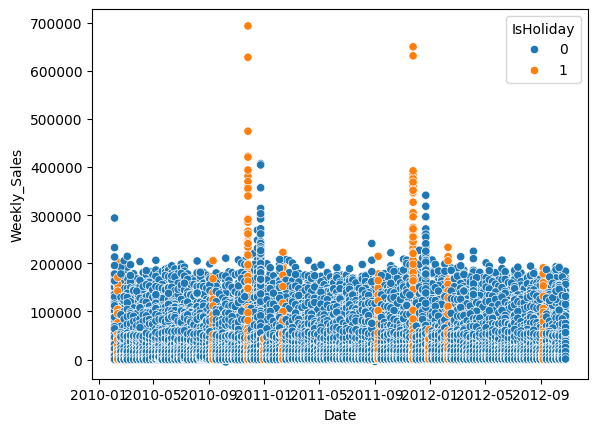

In [61]:
sns.scatterplot(x=df['Date'],y=df['Weekly_Sales'],hue=df['IsHoliday'])

In [64]:
# we dont need to go too hard with outliers as we will be using tree based stacking ensembling models which are robust to outloers and can detect
# complex patterns

In [70]:
df['Weekly_Sales'][df['Weekly_Sales']<0]

188      -863
406      -698
2549      -58
3632      -50
4419     -298
         ... 
419999     -3
420066     -4
420403    -34
420736     -1
421142     -6
Name: Weekly_Sales, Length: 1236, dtype: int32

In [73]:
df['Date'][df['Weekly_Sales']==-6]

13142    2010-11-12
40064    2010-03-05
62140    2010-12-17
65479    2011-12-02
73830    2011-07-01
143620   2011-08-12
161912   2011-05-06
168694   2010-06-18
175374   2012-04-27
185018   2012-03-16
195350   2012-03-30
201975   2011-05-13
204361   2012-01-13
215139   2012-05-11
218712   2010-08-06
224558   2012-03-09
225140   2012-05-11
291699   2012-01-20
298409   2011-05-13
299853   2011-09-30
304723   2010-04-30
308874   2011-06-10
320721   2010-02-19
334727   2011-03-25
339061   2012-06-22
352215   2012-04-13
353009   2012-07-27
355326   2010-09-17
365938   2011-06-10
384963   2011-03-11
391699   2010-05-07
392627   2010-09-24
393547   2011-02-11
397522   2012-08-24
399980   2010-11-19
421142   2012-09-14
Name: Date, dtype: datetime64[ns]

In [86]:
# further simplifying data
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Day']=df['Date'].dt.day
df['LossWeek']=0
def change(row):
    if row['Weekly_Sales']<0:
        row['LossWeek']=1
    else:
        pass
    return row
df=df.apply(change,axis=1)

In [87]:
df.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Month,Year,LossWeek,Day
0,1,2010-02-05,42.310001,2.572,0.0,0.0,0.0,0.0,0.0,211.096359,8.106,0,0,151315,1,24924,2,2010,0,5
1,1,2010-02-05,42.310001,2.572,0.0,0.0,0.0,0.0,0.0,211.096359,8.106,0,0,151315,2,50605,2,2010,0,5


In [89]:
df.drop(['Date'],axis=1,inplace=True)

In [90]:
df.head(2)

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Month,Year,LossWeek,Day
0,1,42.310001,2.572,0.0,0.0,0.0,0.0,0.0,211.096359,8.106,0,0,151315,1,24924,2,2010,0,5
1,1,42.310001,2.572,0.0,0.0,0.0,0.0,0.0,211.096359,8.106,0,0,151315,2,50605,2,2010,0,5


In [91]:
df.corr()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Month,Year,LossWeek,Day
Store,1.000000,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552,-0.000548,0.226410,-0.182881,0.024004,-0.085195,0.001011,0.002997,0.006537,-0.000015
Temperature,-0.050097,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,0.096730,-0.155949,0.042981,-0.058313,0.004437,-0.002312,0.235983,0.065814,-0.000547,0.026832
Fuel_Price,0.065290,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,-0.033853,-0.078281,0.029687,0.003361,0.003572,-0.000121,-0.040876,0.779633,0.005045,0.028058
MarkDown1,-0.059844,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105168,-0.003521,-0.126345,0.169788,0.001494,0.047172,-0.089206,0.501044,-0.000898,-0.126187
MarkDown2,-0.033829,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.041427,0.207604,-0.055318,0.078372,0.000587,0.020716,-0.019360,0.131867,0.004568,0.051971
MarkDown3,-0.020331,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018078,0.266471,-0.024013,0.033641,0.001475,0.038562,0.116031,0.006789,-0.002441,0.072156
MarkDown4,-0.042724,-0.050281,0.166622,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.076513,0.011565,-0.089770,0.127334,0.001937,0.037467,-0.105569,0.335340,-0.002179,-0.152753
MarkDown5,-0.012452,-0.014752,0.215420,0.415050,0.131735,0.042471,0.303370,1.000000,0.067906,-0.120406,-0.015235,-0.130125,0.153011,0.002668,0.050465,0.055770,0.402964,-0.000672,-0.055893
CPI,-0.211088,0.182112,-0.164210,0.010915,-0.003554,-0.005839,-0.002047,0.067906,1.000000,-0.299953,-0.001944,-0.065812,-0.003314,-0.007477,-0.020921,0.005282,0.074544,-0.004947,0.002744
Unemployment,0.208552,0.096730,-0.033853,-0.105168,-0.041427,-0.018078,-0.076513,-0.120406,-0.299953,1.000000,0.010460,0.148720,-0.068238,0.007837,-0.025864,-0.012444,-0.237161,0.002174,-0.003793


In [92]:
# we can see weekly_sales depend less on day

<Axes: xlabel='Day', ylabel='Weekly_Sales'>

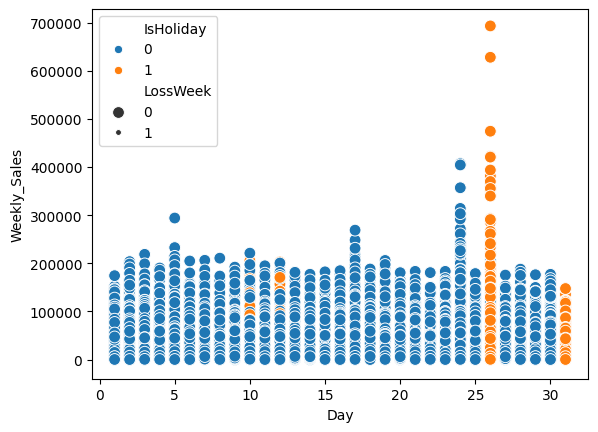

In [95]:
sns.scatterplot(x=df['Day'][df['Year']==2010],y=df['Weekly_Sales'],hue=df['IsHoliday'],size=df['LossWeek'])

In [98]:
df[['Day','Month']][(df['Year']==2010) & (df['Weekly_Sales']>300000)]

,Day,Month
32594,26,11
51826,26,11
90645,26,11
90886,24,12
90936,24,12
110792,26,11
131088,26,11
131321,24,12
131368,24,12
170247,26,11


In [99]:
# 26 november and 24 december are dates in 2010 with large sales

<Axes: xlabel='Day', ylabel='Weekly_Sales'>

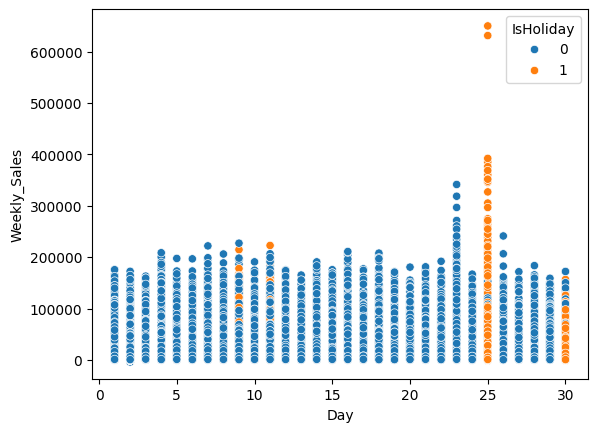

In [101]:
sns.scatterplot(x=df['Day'][df['Year']==2011],y=df['Weekly_Sales'],hue=df['IsHoliday'])

In [102]:
df[['Day','Month']][(df['Year']==2011) & (df['Weekly_Sales']>300000)]

,Day,Month
36312,25,11
36557,23,12
55545,25,11
94393,25,11
94634,23,12
114299,25,11
134722,25,11
173813,25,11
194093,25,11
213530,25,11


In [103]:
# 25 november and 24 december are dates with high sales

In [104]:
df[['Day','Month']][(df['Year']==2012) & (df['Weekly_Sales']>300000)]

,Day,Month


<Axes: xlabel='Day', ylabel='Weekly_Sales'>

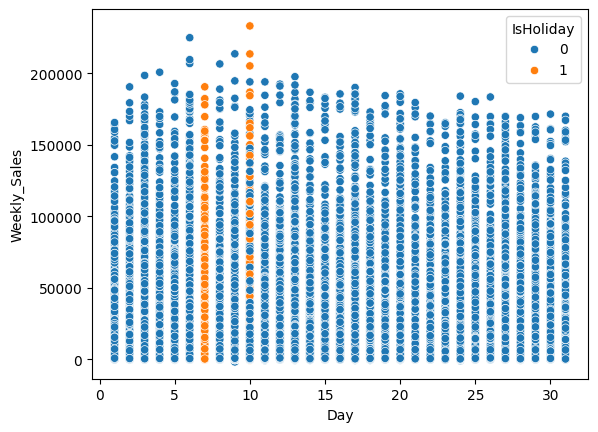

In [106]:
sns.scatterplot(x=df['Day'][df['Year']==2012],y=df['Weekly_Sales'],hue=df['IsHoliday'])

In [107]:
## there are no abnormal sales on the basis of dates

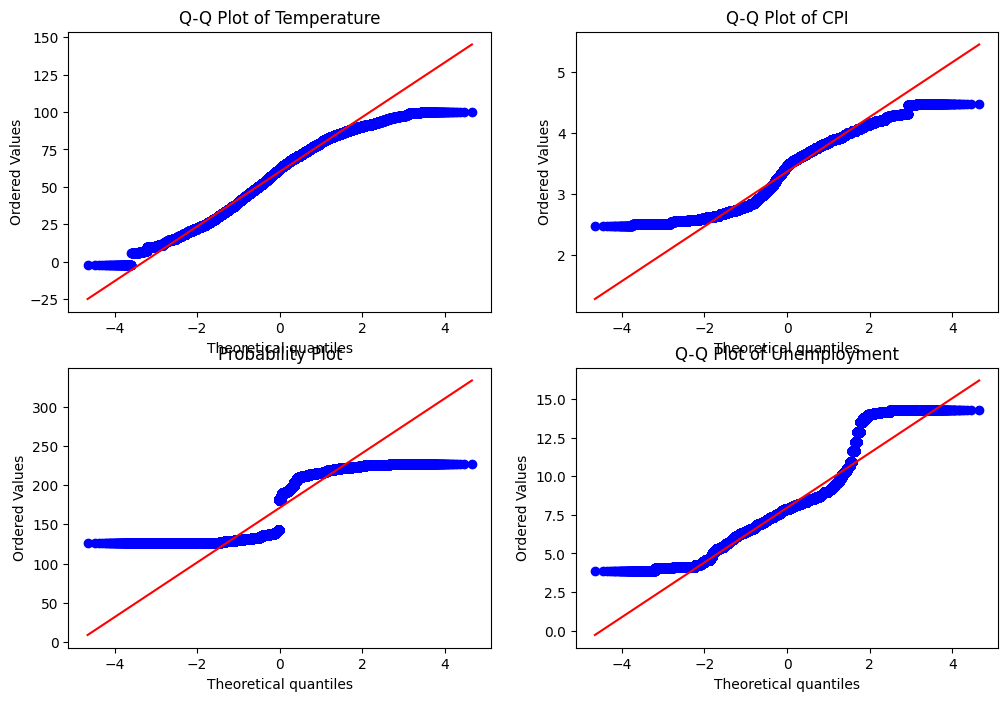

In [111]:
import scipy.stats as stats
fig, axes = plt.subplots(2, 2, figsize=(12,8))

stats.probplot(df['Temperature'], dist="norm", plot=axes[0,0])
axes[0,0].set_title("Q-Q Plot of Temperature")
stats.probplot(df['Fuel_Price'], dist="norm", plot=axes[0,1])
axes[1,0].set_title("Q-Q Plot of Fuel_Price")
stats.probplot(df['CPI'], dist="norm", plot=axes[1,0])
axes[0,1].set_title("Q-Q Plot of CPI")
stats.probplot(df['Unemployment'], dist="norm", plot=axes[1,1])
axes[1,1].set_title("Q-Q Plot of Unemployment")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_31380\4197784626.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature'], ax=axes[0,0])
C:\Users\HP\AppData\Local\Temp\ipykernel_31380\4197784626.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fuel_Price'],ax=axes[0,1])
C:\Users\HP\

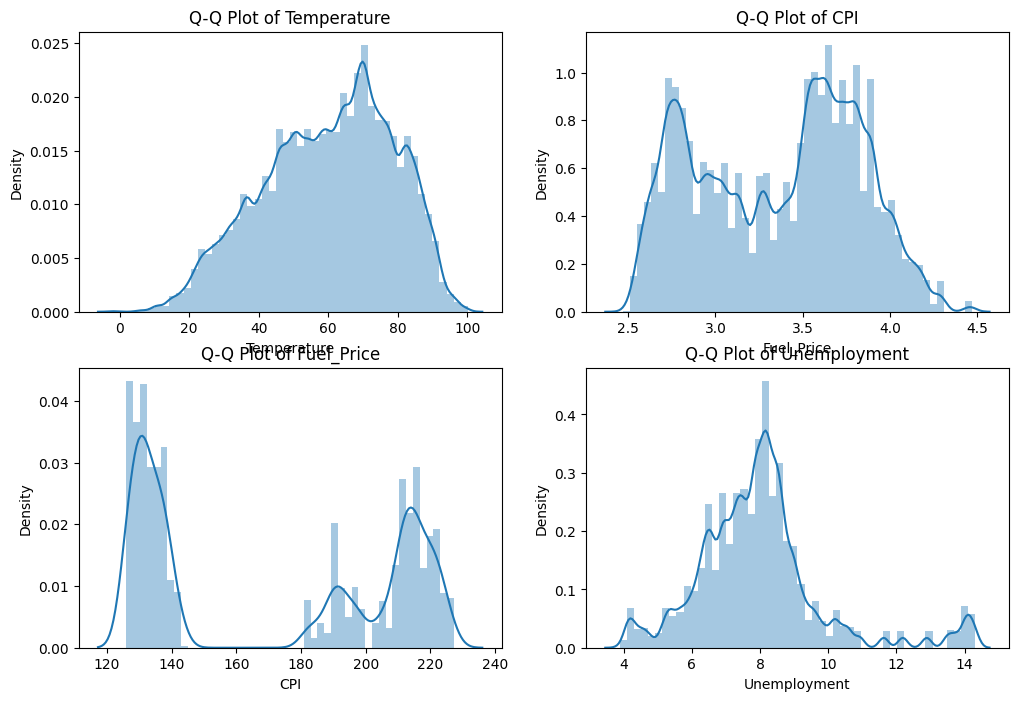

In [113]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.distplot(df['Temperature'], ax=axes[0,0])
axes[0,0].set_title("Q-Q Plot of Temperature")
sns.distplot(df['Fuel_Price'],ax=axes[0,1])
axes[1,0].set_title("Q-Q Plot of Fuel_Price")
sns.distplot(df['CPI'],ax=axes[1,0])
axes[0,1].set_title("Q-Q Plot of CPI")
sns.distplot(df['Unemployment'],ax=axes[1,1])
axes[1,1].set_title("Q-Q Plot of Unemployment")
plt.show()

In [108]:
## INITIAL MODEL TESTINGS

In [114]:
df.head(2)

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Month,Year,LossWeek,Day
0,1,42.310001,2.572,0.0,0.0,0.0,0.0,0.0,211.096359,8.106,0,0,151315,1,24924,2,2010,0,5
1,1,42.310001,2.572,0.0,0.0,0.0,0.0,0.0,211.096359,8.106,0,0,151315,2,50605,2,2010,0,5


In [115]:
df1=df
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(df1.drop(['Weekly_Sales'],axis=1),df1.iloc[:,-5],test_size=0.2,random_state=42)
train_x

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Month,Year,LossWeek,Day
138466,15,31.790001,2.919,0.000000,0.000000,0.000000,0.000000,0.000000,131.735001,8.350,0,1,123737,96,3,2010,0,5
289214,30,59.869999,3.045,0.000000,0.000000,0.000000,0.000000,0.000000,212.903305,8.028,0,2,42988,10,2,2011,0,18
52351,6,46.200001,3.016,0.000000,0.000000,0.000000,0.000000,0.000000,213.339966,6.858,0,0,202505,10,1,2011,0,21
203504,21,65.160004,3.353,0.000000,0.000000,0.000000,0.000000,0.000000,217.165009,7.441,0,1,140167,27,10,2011,0,21
233606,24,41.830002,3.689,2571.979980,66.940002,64304.511719,221.929993,3661.620117,136.478806,8.454,1,0,203819,25,11,2011,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,27,70.190002,2.840,0.000000,0.000000,0.000000,0.000000,0.000000,136.629761,8.021,0,0,204184,4,10,2010,0,1
365838,39,82.099998,3.786,0.000000,0.000000,0.000000,0.000000,0.000000,214.240845,8.300,0,0,184109,80,5,2011,0,27
131932,14,40.700001,3.245,0.000000,0.000000,0.000000,0.000000,0.000000,183.937134,8.549,0,0,200898,93,2,2011,0,18
146867,15,74.639999,3.646,4916.589844,270.100006,24.219999,1747.410034,2772.409912,138.229630,8.193,0,1,123737,16,7,2012,0,6


## RANDOM FOREST TESTING

In [117]:
## RANDOM FOREST TESTING
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_x,train_y)
rf_preds = rf.predict(test_x)
from sklearn.metrics import r2_score
r2_score(rf_preds,test_y)

0.9723019412718847

In [118]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(rf_preds,test_y))

1394.0375214080698


In [119]:
## just employing random forest reached r2_Score to 0.972 and mae to 1394

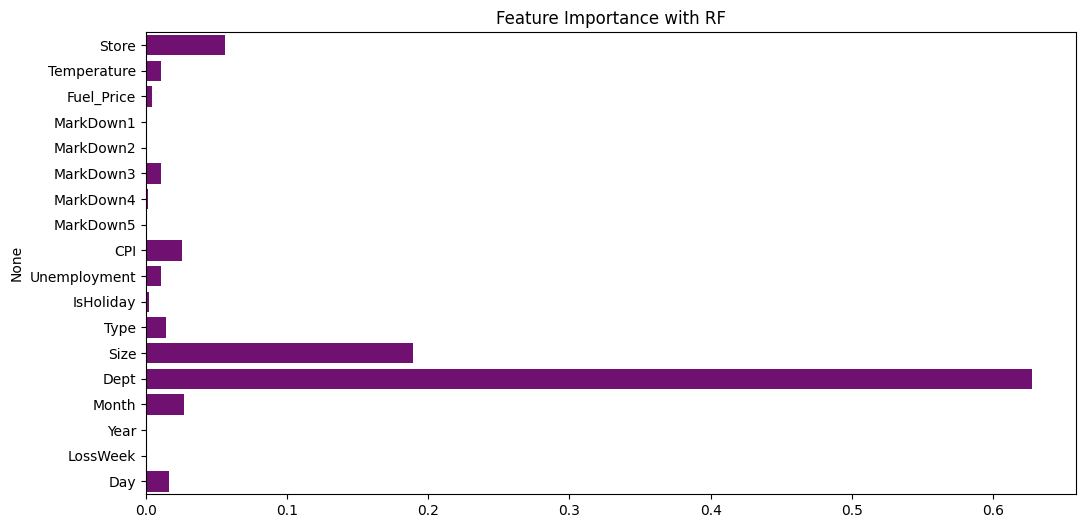

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = rf.feature_importances_
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=train_x.columns,color='purple')
plt.title("Feature Importance with RF")
plt.show()

In [121]:
## features with least importance in random forest
#Markdown1,2,4,5 , IsHoliday,Year,LossWeek


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_drop_columns=['MarkDown1','MarkDown2','MarkDown4','MarkDown5','IsHoliday','Year','LossWeek']
rf1.fit(train_x.drop(rf_drop_columns,axis=1),train_y)

In [123]:
rf1_preds = rf1.predict(test_x.drop(rf_drop_columns,axis=1))
print(r2_score(test_y,rf1_preds))
print(mean_absolute_error(rf1_preds,test_y))

0.9732706072688988
1382.065183006381


In [125]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_drop_columns=['MarkDown1','MarkDown2','MarkDown4','MarkDown5','IsHoliday','Year','LossWeek','Fuel_Price']
rf2.fit(train_x.drop(rf_drop_columns,axis=1),train_y)
rf2_preds = rf2.predict(test_x.drop(rf_drop_columns,axis=1))
print(r2_score(test_y,rf2_preds))
print(mean_absolute_error(rf2_preds,test_y))

0.9734513011944517
1378.0722318950588


## XG Boost TESTING

In [128]:
from xgboost import XGBRegressor
xg =XGBRegressor(n_estimators=100,learning_rate=1.2, random_state=42)
xg.fit(train_x,train_y)
xg_preds = xg.predict(test_x)
print(r2_score(test_y,xg_preds))
print(mean_absolute_error(test_y,xg_preds))

0.9387253522872925
3285.7424675012408


In [129]:
from xgboost import XGBRegressor
xg =XGBRegressor(n_estimators=100,learning_rate=0.6, random_state=42)
xg.fit(train_x,train_y)
xg_preds = xg.predict(test_x)
print(r2_score(test_y,xg_preds))
print(mean_absolute_error(test_y,xg_preds))

0.9490963816642761
2884.217544558281


In [130]:
from xgboost import XGBRegressor
xg =XGBRegressor(n_estimators=100,learning_rate=0.8, random_state=42)
xg.fit(train_x,train_y)
xg_preds = xg.predict(test_x)
print(r2_score(test_y,xg_preds))
print(mean_absolute_error(test_y,xg_preds))

0.9499902725219727
2901.692761611669


In [136]:
from xgboost import XGBRegressor
xg =XGBRegressor(n_estimators=100,learning_rate=0.7, random_state=42)
xg.fit(train_x,train_y)
xg_preds = xg.predict(test_x)
print(r2_score(test_y,xg_preds))
print(mean_absolute_error(test_y,xg_preds))

0.9524345397949219
2781.5898555978542


In [137]:
## best normal results are obtained for xg boost in lr=0.7
# r2_score=0.952
# mae=2781.589

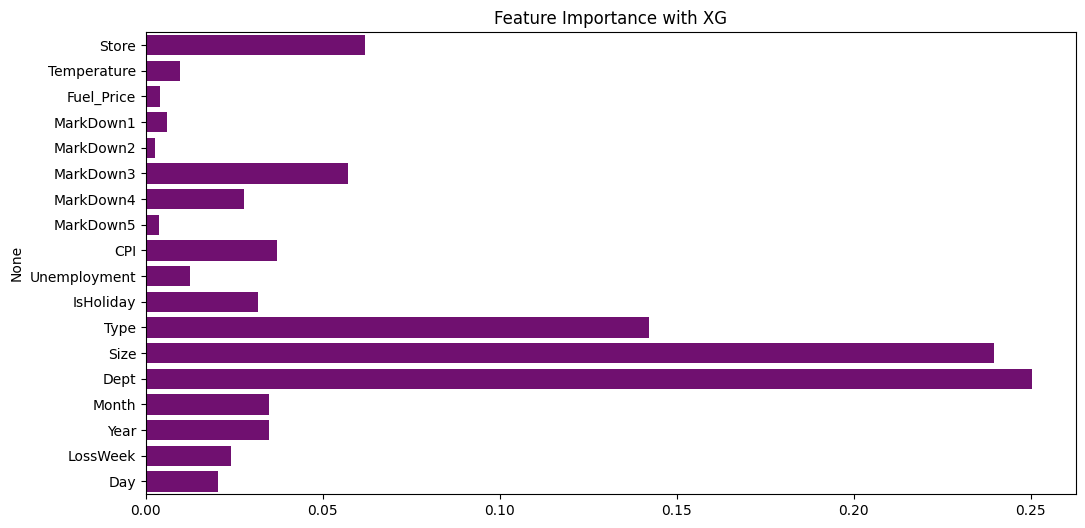

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = xg.feature_importances_
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=train_x.columns,color='purple')
plt.title("Feature Importance with XG")
plt.show()

In [140]:
## features in xg boost with least importance is 
# fuel_price,markdown2,markdown5,markdown1

In [141]:
from xgboost import XGBRegressor
xg1 =XGBRegressor(n_estimators=100,learning_rate=0.7, random_state=42)
xg_drop_columns=['MarkDown1','MarkDown2','MarkDown5','Fuel_Price']
xg1.fit(train_x.drop(xg_drop_columns,axis=1),train_y)
xg1_preds = xg1.predict(test_x.drop(xg_drop_columns,axis=1))
print(r2_score(test_y,xg1_preds))
print(mean_absolute_error(test_y,xg1_preds))

0.9518979787826538
2767.135833496969


In [142]:
from xgboost import XGBRegressor
xg1 =XGBRegressor(n_estimators=100,learning_rate=0.7, random_state=42)
xg_drop_columns=['MarkDown1','MarkDown2','MarkDown5','Fuel_Price','Temperature']
xg1.fit(train_x.drop(xg_drop_columns,axis=1),train_y)
xg1_preds = xg1.predict(test_x.drop(xg_drop_columns,axis=1))
print(r2_score(test_y,xg1_preds))
print(mean_absolute_error(test_y,xg1_preds))

0.9510470628738403
2769.838926183509


## LGB REGRESSOR TESTING

In [148]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=100, learning_rate=0.7)
lgb.fit(train_x, train_y)
lgb_preds = lgb.predict(test_x)
print(mean_absolute_error(test_y,lgb_preds))
print(r2_score(test_y,lgb_preds))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2509
[LightGBM] [Info] Number of data points in the train set: 337256, number of used features: 18
[LightGBM] [Info] Start training from score 15954.679760
2877.6604901648734
0.952600170446476


In [151]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=100, learning_rate=0.6)
lgb.fit(train_x, train_y)
lgb_preds = lgb.predict(test_x)
print(mean_absolute_error(test_y,lgb_preds))
print(r2_score(test_y,lgb_preds))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2509
[LightGBM] [Info] Number of data points in the train set: 337256, number of used features: 18
[LightGBM] [Info] Start training from score 15954.679760
2847.1893193255855
0.9538087211469554


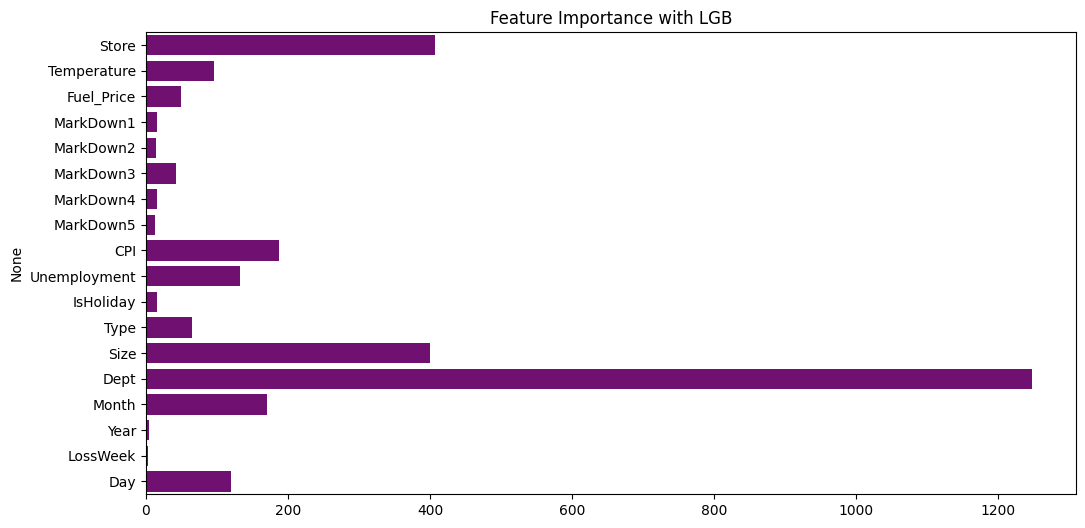

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = lgb.feature_importances_
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=train_x.columns,color='purple')
plt.title("Feature Importance with LGB")
plt.show()

In [154]:
## feature with least importance in lgb regressor
# markdown1,2,4,5,year,lossweak,ishHoliday

In [157]:
from lightgbm import LGBMRegressor
lgb1 =LGBMRegressor(n_estimators=100,learning_rate=0.6)
lgb_drop_columns=['MarkDown1','MarkDown2','MarkDown4','MarkDown5','Year','LossWeek','IsHoliday']
lgb1.fit(train_x.drop(lgb_drop_columns,axis=1),train_y)
lgb1_preds = lgb1.predict(test_x.drop(lgb_drop_columns,axis=1))
print(r2_score(test_y,lgb1_preds))
print(mean_absolute_error(test_y,lgb1_preds))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1481
[LightGBM] [Info] Number of data points in the train set: 337256, number of used features: 11
[LightGBM] [Info] Start training from score 15954.679760
0.9510520997291745
2892.467045393314


In [158]:
from lightgbm import LGBMRegressor
lgb1 =LGBMRegressor(n_estimators=100,learning_rate=0.6)
lgb_drop_columns=['Year','LossWeek']
lgb1.fit(train_x.drop(lgb_drop_columns,axis=1),train_y)
lgb1_preds = lgb1.predict(test_x.drop(lgb_drop_columns,axis=1))
print(r2_score(test_y,lgb1_preds))
print(mean_absolute_error(test_y,lgb1_preds))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2503
[LightGBM] [Info] Number of data points in the train set: 337256, number of used features: 16
[LightGBM] [Info] Start training from score 15954.679760
0.9531604486898011
2885.487403569461


## OBSERVATION ON ABOVE TESTING

<Axes: xlabel='Day', ylabel='Weekly_Sales'>

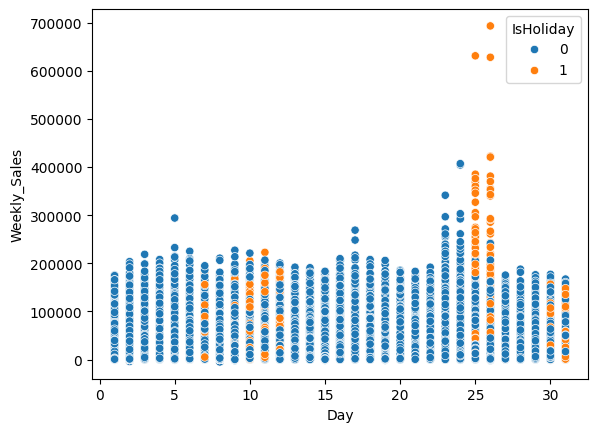

In [172]:
sns.scatterplot(x=train_x['Day'], y=train_y,hue=train_x['IsHoliday'])

<Axes: xlabel='Day', ylabel='Weekly_Sales'>

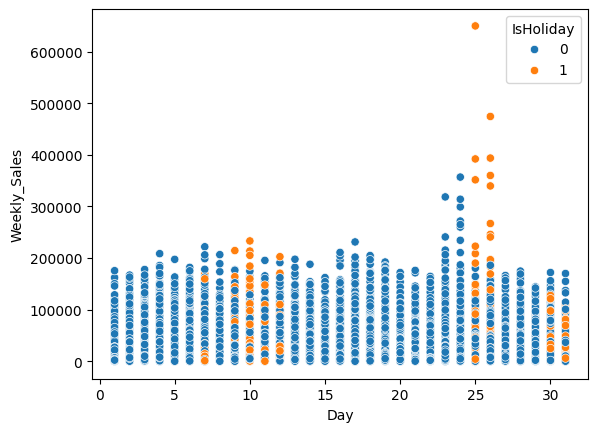

In [173]:
sns.scatterplot(x=test_x['Day'],y=test_y,hue=test_x['IsHoliday'])

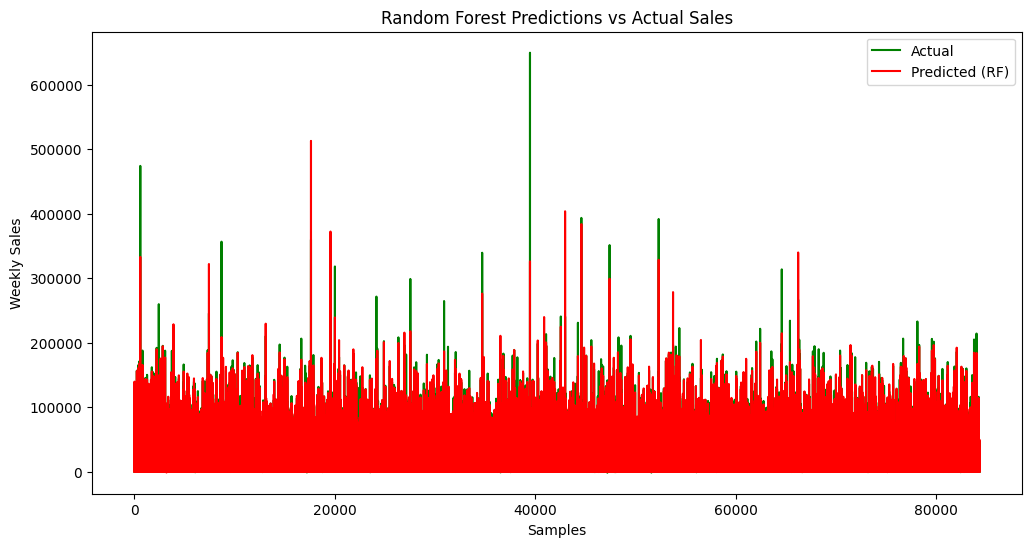

In [174]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_y.values, label='Actual', color='g')
plt.plot(rf2_preds, label='Predicted (RF)', color='r')
plt.title('Random Forest Predictions vs Actual Sales')
plt.xlabel('Samples')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


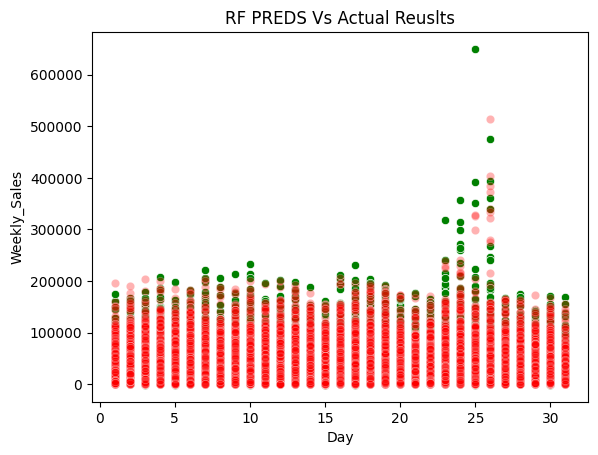

In [181]:
sns.scatterplot(x=test_x['Day'],y=test_y,color='green')
sns.scatterplot(x=test_x['Day'],y=rf2_preds,color='red',alpha=0.3)
plt.title('RF PREDS Vs Actual Reuslts')
plt.show()

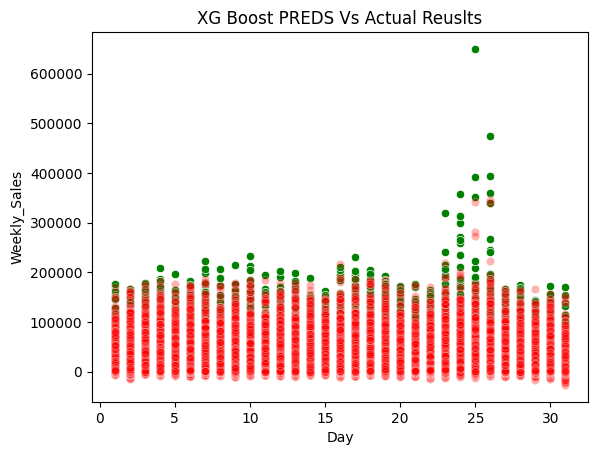

In [182]:
sns.scatterplot(x=test_x['Day'],y=test_y,color='green')
sns.scatterplot(x=test_x['Day'],y=xg1_preds,color='red',alpha=0.3)
plt.title('XG Boost PREDS Vs Actual Reuslts')
plt.show()

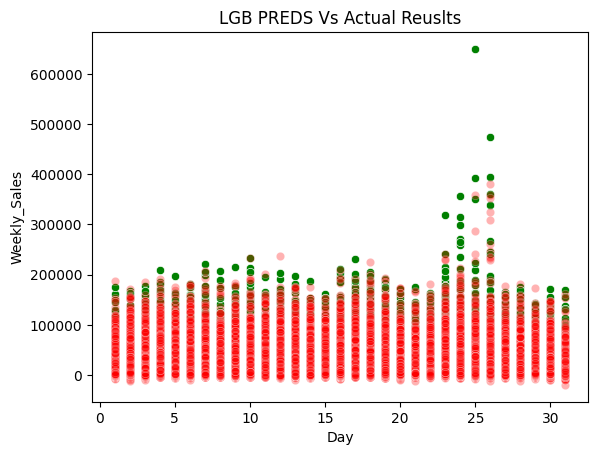

In [183]:
sns.scatterplot(x=test_x['Day'],y=test_y,color='green')
sns.scatterplot(x=test_x['Day'],y=lgb1_preds,color='red',alpha=0.3)
plt.title('LGB PREDS Vs Actual Reuslts')
plt.show()

In [184]:
## Performance is not very well for holiday season

In [186]:
test_y

272342    21577
176581     8370
354212     4985
281444    10512
124208    40924
          ...  
415987     2188
193068     5083
346600    20020
380513    38809
189348    16892
Name: Weekly_Sales, Length: 84314, dtype: int64

In [187]:
rf2_preds

array([21424.95,  7706.41,  4735.57, ..., 20146.19, 37011.12, 14130.96])

In [188]:
xg1_preds

array([21841.986 ,  8261.873 ,  3576.5422, ..., 27236.756 , 36873.395 ,
       10442.052 ], dtype=float32)

In [189]:
lgb1_preds

array([22053.63152791,  6408.98959858,  4417.98381106, ...,
       23260.37300287, 37589.1807642 , 11228.54316412])

In [193]:
final_preds=rf2_preds*0.8+xg1_preds*0.1+lgb1_preds*0.1
print(r2_score(test_y,final_preds))
print(mean_absolute_error(test_y,final_preds))

0.9749999468638273
1435.1735500485906


In [194]:
final_preds=rf2_preds*0.7+xg1_preds*0.15+lgb1_preds*0.15
print(r2_score(test_y,final_preds))
print(mean_absolute_error(test_y,final_preds))

0.974971952944274
1515.5132550841738


In [196]:
final_preds=rf2_preds*0.9+xg1_preds*0.05+lgb1_preds*0.05
print(r2_score(test_y,final_preds))
print(mean_absolute_error(test_y,final_preds))

0.9744930629717691
1385.2259733994222


In [197]:
final_preds=rf2_preds*1+xg1_preds*0+lgb1_preds*0
print(r2_score(test_y,final_preds))
print(mean_absolute_error(test_y,final_preds))

0.9734513011944517
1378.0722318950588


In [198]:
#1,2,5,fuelprice

## Testing with META LASSO MODEL

In [227]:
train_x.head(5)

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Month,Year,LossWeek,Day
138466,15,31.790001,2.919,0.00000,0.000000,0.000000,0.000000,0.000000,131.735001,8.350,0,1,123737,96,3,2010,0,5
289214,30,59.869999,3.045,0.00000,0.000000,0.000000,0.000000,0.000000,212.903305,8.028,0,2,42988,10,2,2011,0,18
52351,6,46.200001,3.016,0.00000,0.000000,0.000000,0.000000,0.000000,213.339966,6.858,0,0,202505,10,1,2011,0,21
203504,21,65.160004,3.353,0.00000,0.000000,0.000000,0.000000,0.000000,217.165009,7.441,0,1,140167,27,10,2011,0,21
233606,24,41.830002,3.689,2571.97998,66.940002,64304.511719,221.929993,3661.620117,136.478806,8.454,1,0,203819,25,11,2011,0,25


In [228]:
train_y.head(5)

138466     1592
289214      161
52351     36427
203504     1792
233606    14598
Name: Weekly_Sales, dtype: int64

In [213]:
train_x.iloc[138466]

Store                4.000000
Temperature         49.000000
Fuel_Price           3.087000
MarkDown1            0.000000
MarkDown2            0.000000
MarkDown3            0.000000
MarkDown4            0.000000
MarkDown5            0.000000
CPI                128.130005
Unemployment         6.510000
IsHoliday            0.000000
Type                 0.000000
Size            205863.000000
Dept                31.000000
Month                2.000000
Year              2011.000000
LossWeek             0.000000
Day                 25.000000
Name: 33501, dtype: float64

In [230]:
print(rf.predict(train_x.iloc[[52351]]))
print(xg.predict(train_x.iloc[[52351]]))
print(lgb.predict(train_x.iloc[[52351]]))

[52.56]
[2174.2202]
[115.15397717]


In [224]:
print(r2_score(train_y,rf.predict(train_x)))
print(mean_absolute_error(train_y,rf.predict(train_x)))

0.9964313749524643
517.6990661989705


In [225]:
print(r2_score(train_y,xg.predict(train_x)))
print(mean_absolute_error(train_y,xg.predict(train_x)))

0.9619030356407166
2638.85160770361


In [226]:
print(r2_score(train_y,lgb.predict(train_x)))
print(mean_absolute_error(train_y,lgb.predict(train_x)))

0.9572591115943776
2829.575448801652


In [232]:
test_y

272342    21577
176581     8370
354212     4985
281444    10512
124208    40924
          ...  
415987     2188
193068     5083
346600    20020
380513    38809
189348    16892
Name: Weekly_Sales, Length: 84314, dtype: int64

In [233]:
rf.predict(test_x)

array([21631.84,  7887.73,  4692.72, ..., 20163.11, 35926.34, 13678.18])

In [234]:
train_y

138466     1592
289214      161
52351     36427
203504     1792
233606    14598
          ...  
259178    39587
365838    11450
131932    59241
146867    36466
121958    12486
Name: Weekly_Sales, Length: 337256, dtype: int64

In [235]:
rf.predict(train_x)

array([ 1701.95,   157.55, 36707.1 , ..., 59808.38, 35679.3 , 14044.51])

In [237]:
n=52351
print(rf.predict(train_x.iloc[[n]]))
# Compare with:
train_y.iloc[n]


[52.56]


51

In [238]:
n=52351
print(xg.predict(train_x.iloc[[n]]))
# Compare with:
train_y.iloc[n]


[2174.2202]


51

In [239]:
n=52351
print(lgb.predict(train_x.iloc[[n]]))
# Compare with:
train_y.iloc[n]

[115.15397717]


51

In [240]:
n=233606 
print(xg.predict(train_x.iloc[[n]]))
print(lgb.predict(train_x.iloc[[n]]))
print(rf.predict(train_x.iloc[[n]]))
train_y.iloc[n]

[20780.562]
[18072.22447805]
[19074.17]


17429

In [241]:
n=289214 
print(xg.predict(train_x.iloc[[n]]))
print(lgb.predict(train_x.iloc[[n]]))
print(rf.predict(train_x.iloc[[n]]))
train_y.iloc[n]

[-304.0846]
[-936.13802729]
[106.24]


61

In [243]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

rf_preds_train = rf.predict(train_x)
xg_preds_train = xg.predict(train_x)
lgb_preds_train = lgb.predict(train_x)

# Create a new dataframe for stacking
meta_x = pd.DataFrame({
    'rf': rf_preds_train,
    'xgb': xg_preds_train,
    'lgb': lgb_preds_train,
    'MarkDown1': train_x['MarkDown1'].values,
    'MarkDown2': train_x['MarkDown2'].values,
    'MarkDown5': train_x['MarkDown5'].values,
    'Fuel_Price': train_x['Fuel_Price'].values,
})

# Target remains the same
meta_y = train_y

# Train LassoCV (with cross-validation to tune alpha)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(meta_x, meta_y)

rf_preds_test = rf.predict(test_x)
xg_preds_test = xg.predict(test_x)
lgb_preds_test = lgb.predict(test_x)

meta_x_test = pd.DataFrame({
    'rf': rf_preds_test,
    'xgb': xg_preds_test,
    'lgb': lgb_preds_test,
    'MarkDown1': test_x['MarkDown1'].values,
    'MarkDown2': test_x['MarkDown2'].values,
    'MarkDown5': test_x['MarkDown5'].values,
    'Fuel_Price': test_x['Fuel_Price'].values,
})


# Make predictions
stack_preds = lasso.predict(meta_x_test)

print("R2 Score:", r2_score(test_y, stack_preds))
print("MAE:", mean_absolute_error(test_y, stack_preds))



R2 Score: 0.9727702096045342
MAE: 1406.8748105034365


In [259]:
from sklearn.preprocessing import StandardScaler

rf_preds_train = rf.predict(train_x)
xg_preds_train = xg.predict(train_x)
lgb_preds_train = lgb.predict(train_x)

meta_x = pd.DataFrame({
    'rf': rf_preds_train,
    'xgb': xg_preds_train,
    'lgb': lgb_preds_train,
    'MarkDown1': train_x['MarkDown1'].values,
    'MarkDown2': train_x['MarkDown2'].values,
    'MarkDown5': train_x['MarkDown5'].values,
    'Fuel_Price': train_x['Fuel_Price'].values,
})

meta_y = train_y
scaler=StandardScaler()
meta_x_scaled=scaler.fit_transform(meta_x)
lasso1 = LassoCV(cv=5, random_state=42)
lasso1.fit(meta_x_scaled, meta_y)

rf_preds_test = rf.predict(test_x)
xg_preds_test = xg.predict(test_x)
lgb_preds_test = lgb.predict(test_x)

meta_x_test = pd.DataFrame({
    'rf': rf_preds_test,
    'xgb': xg_preds_test,
    'lgb': lgb_preds_test,
    'MarkDown1': test_x['MarkDown1'].values,
    'MarkDown2': test_x['MarkDown2'].values,
    'MarkDown5': test_x['MarkDown5'].values,
    'Fuel_Price': test_x['Fuel_Price'].values,
})

meta_x_test_scaled=scaler.transform(meta_x_test)
stack_preds1 = lasso1.predict(meta_x_test_scaled)

print("R2 Score:", r2_score(test_y, stack_preds1))
print("MAE:", mean_absolute_error(test_y, stack_preds1))


R2 Score: 0.9727643371288405
MAE: 1406.690691448097


In [245]:
print("Best alpha chosen by CV:", lasso.alpha_)


Best alpha chosen by CV: 508374.1225578042


In [246]:
pd.Series(lasso.coef_, index=meta_x.columns).sort_values(ascending=False)


rf            1.025644
xgb          -0.000000
MarkDown1    -0.000000
MarkDown2    -0.000000
MarkDown5    -0.000000
Fuel_Price   -0.000000
lgb          -0.021546
dtype: float64

In [247]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler

rf_preds_train = rf.predict(train_x)
xg_preds_train = xg.predict(train_x)
lgb_preds_train = lgb.predict(train_x)

meta_x = pd.DataFrame({
    'rf': rf_preds_train,
    'xgb': xg_preds_train,
    'lgb': lgb_preds_train,
    'MarkDown1': train_x['MarkDown1'].values,
    'MarkDown2': train_x['MarkDown2'].values,
    'MarkDown5': train_x['MarkDown5'].values,
    'Fuel_Price': train_x['Fuel_Price'].values,
})

meta_y = train_y
scaler=StandardScaler()
meta_x_scaled=scaler.fit_transform(meta_x)
enet = ElasticNetCV(cv=5, l1_ratio=[.1, .5, .7, .9, .95, 1], random_state=42)
enet.fit(meta_x_scaled, meta_y)

rf_preds_test = rf.predict(test_x)
xg_preds_test = xg.predict(test_x)
lgb_preds_test = lgb.predict(test_x)

meta_x_test = pd.DataFrame({
    'rf': rf_preds_test,
    'xgb': xg_preds_test,
    'lgb': lgb_preds_test,
    'MarkDown1': test_x['MarkDown1'].values,
    'MarkDown2': test_x['MarkDown2'].values,
    'MarkDown5': test_x['MarkDown5'].values,
    'Fuel_Price': test_x['Fuel_Price'].values,
})

meta_x_test_scaled=scaler.transform(meta_x_test)
stack_preds2 = enet.predict(meta_x_test_scaled)

print("R2 Score:", r2_score(test_y, stack_preds2))
print("MAE:", mean_absolute_error(test_y, stack_preds2))



R2 Score: 0.9727643371288405
MAE: 1406.690691448097


In [249]:
meta_x

,rf,xgb,lgb,MarkDown1,MarkDown2,MarkDown5,Fuel_Price
0,1701.95,67.003189,-1368.774254,0.000000,0.000000,0.000000,2.919
1,157.55,2219.600098,3057.780041,0.000000,0.000000,0.000000,3.045
2,36707.10,31977.470703,38801.614220,0.000000,0.000000,0.000000,3.016
3,1753.82,1101.152832,583.212502,0.000000,0.000000,0.000000,3.353
4,14632.47,10047.808594,13438.636803,2571.979980,66.940002,3661.620117,3.689
...,...,...,...,...,...,...,...
337251,42720.47,45942.570312,39090.032205,0.000000,0.000000,0.000000,2.840
337252,11503.37,17158.738281,14566.280749,0.000000,0.000000,0.000000,3.786
337253,59808.38,65767.851562,62270.849782,0.000000,0.000000,0.000000,3.245
337254,35679.30,29269.089844,23143.351239,4916.589844,270.100006,2772.409912,3.646


In [250]:
meta_x.corr()

,rf,xgb,lgb,MarkDown1,MarkDown2,MarkDown5,Fuel_Price
rf,1.000000,0.984807,0.983018,0.048528,0.022903,0.050158,0.000096
xgb,0.984807,1.000000,0.986656,0.049037,0.021026,0.049982,0.000286
lgb,0.983018,0.986656,1.000000,0.049495,0.021396,0.051135,-0.000094
MarkDown1,0.048528,0.049037,0.049495,1.000000,0.175356,0.417307,0.297531
MarkDown2,0.022903,0.021026,0.021396,0.175356,1.000000,0.132805,0.029532
MarkDown5,0.050158,0.049982,0.051135,0.417307,0.132805,1.000000,0.216547
Fuel_Price,0.000096,0.000286,-0.000094,0.297531,0.029532,0.216547,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_31380\779936272.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(meta_x['rf'],ax=axes[0,0])
C:\Users\HP\AppData\Local\Temp\ipykernel_31380\779936272.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(meta_x['xgb'],ax=axes[0,1])
C:\Users\HP\AppData\Loc

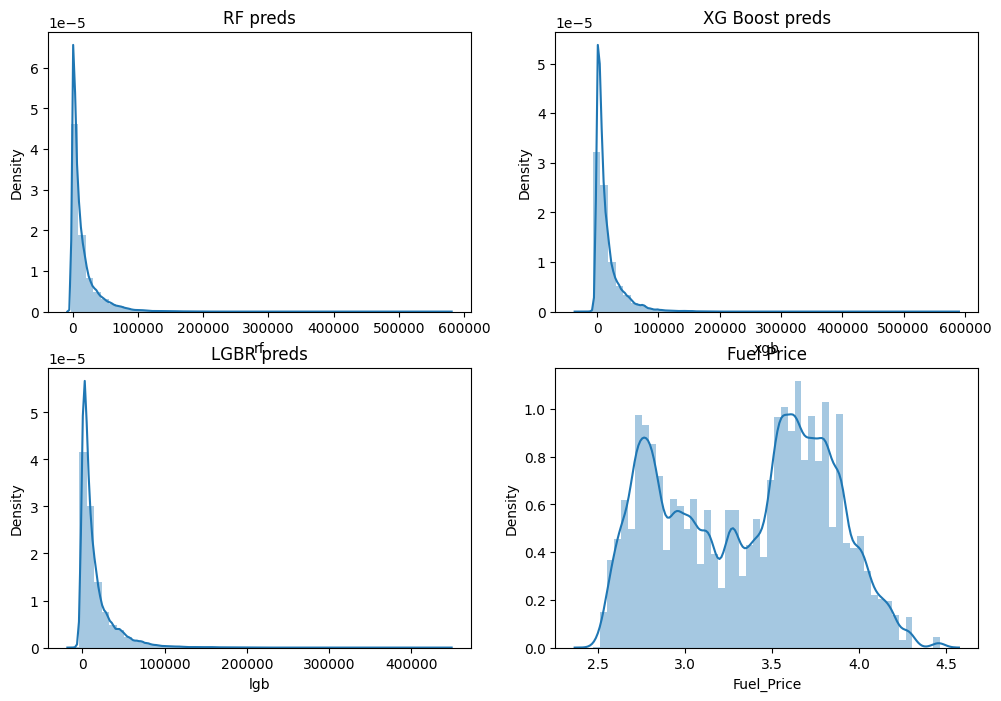

In [254]:
fig,axes=plt.subplots(2,2,figsize=(12,8))

sns.distplot(meta_x['rf'],ax=axes[0,0])
axes[0,0].set_title('RF preds')

sns.distplot(meta_x['xgb'],ax=axes[0,1])
axes[0,1].set_title('XG Boost preds')

sns.distplot(meta_x['lgb'],ax=axes[1,0])
axes[1,0].set_title('LGBR preds')

sns.distplot(meta_x['Fuel_Price'],ax=axes[1,1])
axes[1,1].set_title('Fuel Price')
plt.show()



In [255]:
## since the data of xgb,rf,lgb are skewed, we would use log transformation on them

In [262]:
# SCALING AND TRANSFORMING

from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd
import numpy as np

# Step 1: Create meta features for training set
rf_preds_train = rf.predict(train_x)
xg_preds_train = xg.predict(train_x)
lgb_preds_train = lgb.predict(train_x)

meta_x = pd.DataFrame({
    'rf': rf_preds_train,
    'xgb': xg_preds_train,
    'lgb': lgb_preds_train,
    'MarkDown1': train_x['MarkDown1'].values,
    'MarkDown2': train_x['MarkDown2'].values,
    'MarkDown5': train_x['MarkDown5'].values,
    'Fuel_Price': train_x['Fuel_Price'].values,
})

meta_y = train_y

# Step 2: Apply Yeo-Johnson transformation (safe for negative values)
pt = PowerTransformer(method='yeo-johnson')
meta_x_yeo = pt.fit_transform(meta_x)

# Step 3: Train LassoCV
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(meta_x_yeo, meta_y)

# Step 4: Prepare test meta features
rf_preds_test = rf.predict(test_x)
xg_preds_test = xg.predict(test_x)
lgb_preds_test = lgb.predict(test_x)

meta_x_test = pd.DataFrame({
    'rf': rf_preds_test,
    'xgb': xg_preds_test,
    'lgb': lgb_preds_test,
    'MarkDown1': test_x['MarkDown1'].values,
    'MarkDown2': test_x['MarkDown2'].values,
    'MarkDown5': test_x['MarkDown5'].values,
    'Fuel_Price': test_x['Fuel_Price'].values,
})

# Step 5: Apply same Yeo-Johnson transformation to test meta features
meta_x_test_yeo = pt.transform(meta_x_test)

# Step 6: Predict with Lasso
stack_preds = lasso.predict(meta_x_test_yeo)

# Step 7: Evaluate
print("R2 Score:", r2_score(test_y, stack_preds))
print("MAE:", mean_absolute_error(test_y, stack_preds))




R2 Score: 0.8951676890395224
MAE: 4211.599114929169


In [263]:
pred_table= pd.DataFrame({
    'rf': rf_preds_train,
    'xgb': xg_preds_train,
    'lgb': lgb_preds_train,
    'MarkDown1': train_x['MarkDown1'].values,
    'MarkDown2': train_x['MarkDown2'].values,
    'MarkDown5': train_x['MarkDown5'].values,
    'Fuel_Price': train_x['Fuel_Price'].values,
    'Target':train_y.values
})

In [264]:
pred_table

,rf,xgb,lgb,MarkDown1,MarkDown2,MarkDown5,Fuel_Price,Target
0,1701.95,67.003189,-1368.774254,0.000000,0.000000,0.000000,2.919,1592
1,157.55,2219.600098,3057.780041,0.000000,0.000000,0.000000,3.045,161
2,36707.10,31977.470703,38801.614220,0.000000,0.000000,0.000000,3.016,36427
3,1753.82,1101.152832,583.212502,0.000000,0.000000,0.000000,3.353,1792
4,14632.47,10047.808594,13438.636803,2571.979980,66.940002,3661.620117,3.689,14598
...,...,...,...,...,...,...,...,...
337251,42720.47,45942.570312,39090.032205,0.000000,0.000000,0.000000,2.840,39587
337252,11503.37,17158.738281,14566.280749,0.000000,0.000000,0.000000,3.786,11450
337253,59808.38,65767.851562,62270.849782,0.000000,0.000000,0.000000,3.245,59241
337254,35679.30,29269.089844,23143.351239,4916.589844,270.100006,2772.409912,3.646,36466


In [265]:
## ANALYZING PREDICTION TABLE ON ITS OWN

In [266]:
pred_table.corr()

,rf,xgb,lgb,MarkDown1,MarkDown2,MarkDown5,Fuel_Price,Target
rf,1.000000,0.984807,0.983018,0.048528,0.022903,0.050158,0.000096,0.998233
xgb,0.984807,1.000000,0.986656,0.049037,0.021026,0.049982,0.000286,0.980788
lgb,0.983018,0.986656,1.000000,0.049495,0.021396,0.051135,-0.000094,0.978511
MarkDown1,0.048528,0.049037,0.049495,1.000000,0.175356,0.417307,0.297531,0.047403
MarkDown2,0.022903,0.021026,0.021396,0.175356,1.000000,0.132805,0.029532,0.020749
MarkDown5,0.050158,0.049982,0.051135,0.417307,0.132805,1.000000,0.216547,0.048597
Fuel_Price,0.000096,0.000286,-0.000094,0.297531,0.029532,0.216547,1.000000,0.000012
Target,0.998233,0.980788,0.978511,0.047403,0.020749,0.048597,0.000012,1.000000


In [267]:
## Feature engineering

In [269]:
pred_table.isnull().sum()
# no null values

rf            0
xgb           0
lgb           0
MarkDown1     0
MarkDown2     0
MarkDown5     0
Fuel_Price    0
Target        0
dtype: int64

In [270]:
# checking for invalid rows
pred_table[pred_table['xgb']<0]

,rf,xgb,lgb,MarkDown1,MarkDown2,MarkDown5,Fuel_Price,Target
18,12.78,-528.630066,4748.675689,9983.589844,0.000000,7158.660156,3.610,10
23,212.34,-1865.093750,-928.874617,0.000000,0.000000,0.000000,3.010,193
28,2836.90,-459.387512,1712.181933,0.000000,0.000000,0.000000,3.046,2913
36,2357.96,-494.693970,5323.358814,0.000000,0.000000,0.000000,2.771,2354
55,107.41,-1819.626587,-1690.130486,0.000000,0.000000,0.000000,4.202,93
...,...,...,...,...,...,...,...,...
337221,1030.09,-712.219910,-1817.796296,0.000000,0.000000,0.000000,2.514,671
337222,1436.62,-513.706421,-337.859453,408.100006,0.000000,604.799988,3.545,1555
337237,92.49,-624.671753,122.080873,0.000000,0.000000,0.000000,3.581,88
337238,541.22,-536.658752,393.879483,5809.229980,32.400002,3054.629883,3.372,506


In [271]:
pred_table[pred_table['lgb']<0]

,rf,xgb,lgb,MarkDown1,MarkDown2,MarkDown5,Fuel_Price,Target
0,1701.95,67.003189,-1368.774254,0.000000,0.000000,0.000000,2.919,1592
23,212.34,-1865.093750,-928.874617,0.000000,0.000000,0.000000,3.010,193
37,29.69,1014.067383,-996.494940,270.589996,18.530001,1148.170044,3.145,12
55,107.41,-1819.626587,-1690.130486,0.000000,0.000000,0.000000,4.202,93
71,25.98,-250.130127,-219.341575,0.000000,0.000000,0.000000,3.100,22
...,...,...,...,...,...,...,...,...
337223,506.44,7221.125488,-487.525555,0.000000,0.000000,0.000000,3.080,521
337225,161.91,769.433716,-711.011796,0.000000,0.000000,0.000000,2.637,159
337244,2856.13,3626.927246,-1188.649390,0.000000,0.000000,0.000000,3.437,2737
337245,1406.22,1.392147,-1482.032467,512.229980,3.000000,1666.380005,3.506,1328


In [272]:
pred_table[pred_table['rf']<0]

,rf,xgb,lgb,MarkDown1,MarkDown2,MarkDown5,Fuel_Price,Target
226,-280.66,-83.946503,815.378608,0.000000,0.0,0.000000,2.869,-372
784,-8.03,48.447746,1539.634922,0.000000,0.0,0.000000,3.989,-9
1452,-190.43,-1059.044067,-90.891757,6415.859863,0.0,2976.989990,3.837,-279
1712,-10.55,-113.101997,1836.628064,0.000000,0.0,0.000000,2.950,-7
1942,-167.88,-915.939453,-3673.533376,2732.080078,98.0,2456.790039,3.263,-168
...,...,...,...,...,...,...,...,...
335527,-53.13,3252.659912,-6048.683713,0.000000,0.0,0.000000,3.087,-173
335934,-123.59,-1203.474487,-1663.042786,8475.440430,0.0,2904.459961,3.848,-173
336579,-10.76,-627.062805,2252.371902,0.000000,0.0,0.000000,2.877,-14
336613,-10.25,-866.090393,-77.751423,0.000000,0.0,0.000000,2.911,-10


In [276]:
test_table=pd.DataFrame({
    'rf': rf_preds_test,
    'xgb': xg_preds_test,
    'lgb': lgb_preds_test,
    'MarkDown1': test_x['MarkDown1'].values,
    'MarkDown2': test_x['MarkDown2'].values,
    'MarkDown5': test_x['MarkDown5'].values,
    'Fuel_Price': test_x['Fuel_Price'].values,
})

In [282]:
from sklearn.ensemble import RandomForestRegressor
rf_ = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=12)
rf_.fit(pred_table.drop(['Target'],axis=1),pred_table['Target'])
rf__preds = rf_.predict(test_table)
from sklearn.metrics import r2_score
print(r2_score(rf__preds,test_y))
print(mean_absolute_error(test_y,rf__preds))

0.9714388821446815
1415.721841946388


In [283]:
from sklearn.ensemble import RandomForestRegressor
rf_ = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=7)
rf_.fit(pred_table.drop(['Target'],axis=1),pred_table['Target'])
rf__preds = rf_.predict(test_table)
from sklearn.metrics import r2_score
print(r2_score(rf__preds,test_y))
print(mean_absolute_error(test_y,rf__preds))

0.9727676294003851
1398.9344813344717


In [291]:
from sklearn.ensemble import RandomForestRegressor
rf_ = RandomForestRegressor(n_estimators=60, random_state=42,max_depth=7,max_features=6)
rf_.fit(pred_table.drop(['Target'],axis=1),pred_table['Target'])
rf__preds = rf_.predict(test_table)
from sklearn.metrics import r2_score
print(r2_score(rf__preds,test_y))
print(mean_absolute_error(test_y,rf__preds))

0.9731305474774311
1398.8153269020918


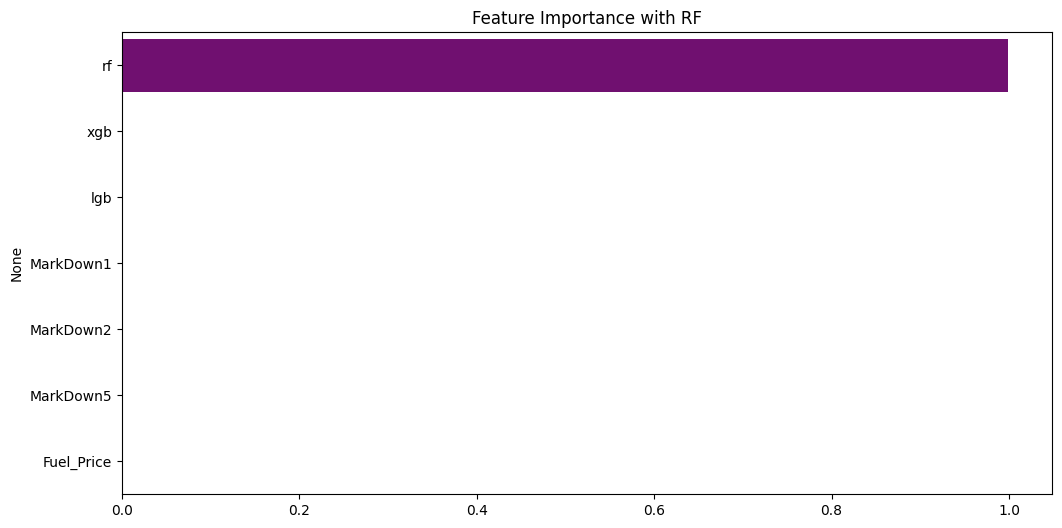

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = rf_.feature_importances_
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=pred_table.drop(['Target'],axis=1).columns,color='purple')
plt.title("Feature Importance with RF")
plt.show()

In [ ]:
from sklearn.svm import SVR
svr_model=SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_model.fit(pred_table.drop(['Target'], axis=1), pred_table['Target'])
svr_preds = svr_model.predict(test_table)
print("R2 Score:", r2_score(test_y, svr_preds))
print("MAE:", mean_absolute_error(test_y, svr_preds))

In [1]:
print('hello')

hello
